In [2]:
import pandas as pd

sales_df = pd.read_csv("advertising_and_sales_clean.csv")
print(sales_df.head())

        tv     radio  social_media influencer      sales
0  16000.0   6566.23       2907.98       Mega   54732.76
1  13000.0   9237.76       2409.57       Mega   46677.90
2  41000.0  15886.45       2913.41       Mega  150177.83
3  83000.0  30020.03       6922.30       Mega  298246.34
4  15000.0   8437.41       1406.00      Micro   56594.18


In [3]:
X = sales_df["radio"].values
Y = sales_df["sales"].values

X_bmi = X.reshape(-1, 1)

print(X_bmi.shape)

(4546, 1)


In [4]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_bmi, Y)
predicions = reg.predict(X_bmi)

print(predicions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


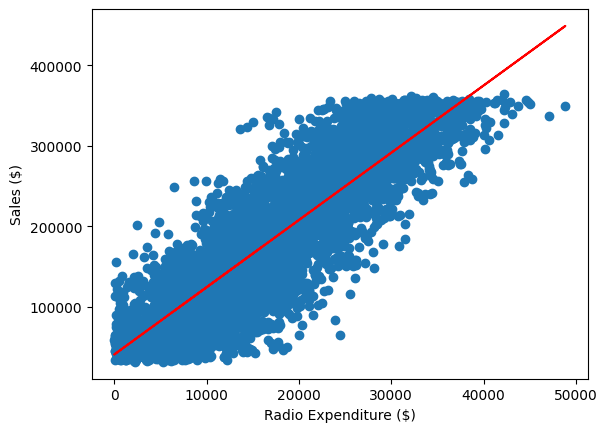

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X_bmi, Y, colorizer="blue")
plt.plot(X_bmi, predicions, color="red")

plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

plt.show()